# Clustering. K-means algorithm

## Introduction

**Purpose:** clasify the examples in a data set in k groups (clusters) based on their similarity.

## Algorithm

<pre>
Randomly initialize K cluster centroids &mu;<sub>1</sub>, &mu;<sub>2</sub>, ..., &mu;<sub>k</sub>
Repeat {
    # Assign points to cluster centroids
    for i = 1 to m
        c<sup>(i)</sup> := index (from 1 to K) of cluster centroid closest to x<sup>(i)</sup>
                                      min<sub>k</sub> ||x<sup>(i)</sup> - &mu;<sub>k</sub>||<sup>2</sup>

    # Move cluster centroids
    for k = 1 to K
        &mu;<sub>k</sub> := average of points assigned to cluster k
}
</pre>

Note: $||(x^{(i)} - \mu_k)||$ is the norm (distance) between the example $x^{(i)}$ and the centroid $\mu_k$

Why it does converge? Because it is in fact minimizing the following cost function (called _"distortion"_):
$$
J(c^{(1)},..., c^{(m)},\mu_1,...,\mu_k) = 1/m \sum_{i=1}^m || x^{(i)} - \mu_{c^{(i)}} ||^2
$$

Where $\mu_{c^{(i)}}$ is the centroid assigned to $x^{(i)}$ 

## Initializing k-means

The k-means algorithm randomly initialized can end up finding local mimimum that is not a global minimum. To avoid this, use the following algorithm

<pre>
For i = 1 to 100 {
    Randomly initialize k-means (for example, assigin the k centroids to k randomly selected samples)
    Run K-means
    Compute the cost function for the resulting centroids (J)
}
Pick the set of clusters that gave the lowest cost J
</pre>

Practical recomendation: use 50 - 1000 iterations

## Choosing the number of clusters

There is no definitive answer.

Elbow method: plotting the cost function as a funtion of the number of clusters, look for the elbow
A.Ng recomendation: choose depending the later, downstream, purpose for doing the clustering.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def init_centroids(X, k):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        k (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:k]]
    
    return centroids

In [3]:
def closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    idx = np.apply_along_axis(lambda x: np.argmin(np.linalg.norm(x - centroids, axis=1)**2), 1, X)  
    
    return idx

In [4]:
def distortion(X, centroids, idx):
    """
    Computes the distortion, given the samples and a set of centorids
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
    
    Returns:
        J (float64): distortion
    
    """

    m = X.shape[0]
    J = 0

    for i in range(m):
        J += np.linalg.norm(X[i] - centroids[idx[i]], axis=0)**2
    
    return 1 / m * J
    

In [5]:
def compute_centroids(X, idx, k):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    centroids = np.zeros((k, n))
    
    for i in range(k):
        centroids[i] = np.average(X[idx==i,:], axis=0)
        
    return centroids

In [6]:
def k_means_iteration(X, k, iter):
    """
    Implements one execution of the K-means algorithm

    Ars: 
        X(ndarray): Data points
        K (int):    Number of centroids/clusters
        iter (int): Max number of iterations
    
    Returns:
        centroids (ndarray): Found centroids
        J (float64):    Distortion
    
    """

    # Note: The requested number of iterations are executed. An improvement would be 
    # to check for convergence by assessing if the gain in distortion is below a certain 
    # threshold.

    centroids = init_centroids(X, k)

    for i in range(iter):
        idx = closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
        J = distortion(X, centroids, idx)
        print(f"Iteration {i}/iter --> J = {J}")

    return centroids, J


In [7]:
def k_means(X, k, iter, num_sel):
    """
    Implements the K-means algorithm choosing the best of num_sel individual executions 

    Ars: 
        X(ndarray):     Data points
        K (int):        Number of centroids/clusters
        iter (int):     Max number of iterations for each esecution of the algorithm
        num_sel(int):   Number of random samples of initialial centroids to try
    
    Returns:
        centroids (ndarray): Found centroids
        J (float64):    Distortion
    
    """

    centroids_best = np.zeros((k, X.shape[1]))
    J_best = np.inf

    for i in range(num_sel):
        print(f"Selection {i} ===================>")
        centroids, J = k_means_iteration(X, k, iter)
        if J < J_best:
            centroids_best = centroids
            J = J_best

    return centroids_best

In [8]:
# Create data set
X1 = np.array([
        np.random.normal(loc=2, scale=1, size=30),
        np.random.normal(loc=5, scale=3, size=30)
]).T

X2 = np.array([
        np.random.normal(loc=7, scale=2, size=30),
        np.random.normal(loc=1, scale=1, size=30)
]).T

X3 = np.array([
        np.random.normal(loc=10, scale=2, size=30),
        np.random.normal(loc=6, scale=1, size=30)
]).T

X = np.concatenate((X1, X2, X3))

In [9]:
centroids = k_means(X, 3, 10, 30)

Selection 0 ===================>
Iteration 0/iter --> J = 12.432147794847467
Iteration 1/iter --> J = 8.68415760441299
Iteration 2/iter --> J = 6.9790096535762
Iteration 3/iter --> J = 6.346515719135045
Iteration 4/iter --> J = 6.097780640673455
Iteration 5/iter --> J = 6.097780640673455
Iteration 6/iter --> J = 6.097780640673455
Iteration 7/iter --> J = 6.097780640673455
Iteration 8/iter --> J = 6.097780640673455
Iteration 9/iter --> J = 6.097780640673455
Selection 1 ===================>
Iteration 0/iter --> J = 9.465438190862042
Iteration 1/iter --> J = 7.838383703935047
Iteration 2/iter --> J = 7.09545744488881
Iteration 3/iter --> J = 6.625785472587072
Iteration 4/iter --> J = 6.231677936972949
Iteration 5/iter --> J = 6.097780640673455
Iteration 6/iter --> J = 6.097780640673455
Iteration 7/iter --> J = 6.097780640673455
Iteration 8/iter --> J = 6.097780640673455
Iteration 9/iter --> J = 6.097780640673455
Selection 2 ===================>
Iteration 0/iter --> J = 9.064353250051528
I

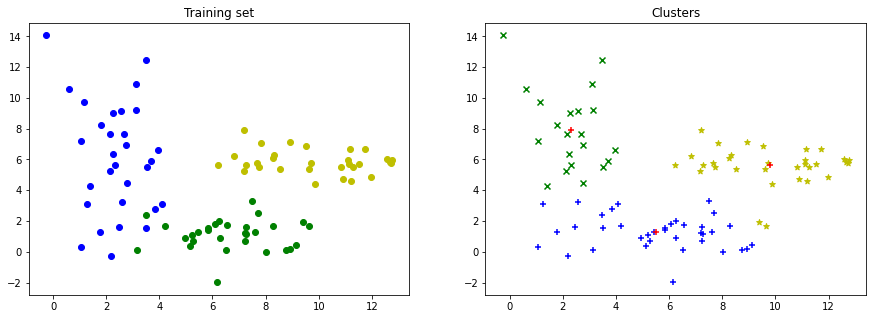

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title(label="Training set")
ax[0].scatter(X1[:,0],X1[:,1], c='b')
ax[0].scatter(X2[:,0],X2[:,1], c='g')
ax[0].scatter(X3[:,0],X3[:,1], c='y')

ax[1].set_title(label="Clusters")
ax[1].scatter(X[closest_centroids(X ,centroids)==2,0],X[closest_centroids(X ,centroids)==2,1], c='b', marker = '+')
ax[1].scatter(X[closest_centroids(X ,centroids)==0,0],X[closest_centroids(X ,centroids)==0,1], c='y', marker = '*')
ax[1].scatter(X[closest_centroids(X ,centroids)==1,0],X[closest_centroids(X ,centroids)==1,1], c='g', marker = 'x')
ax[1].scatter(centroids[:,0], centroids[:,1], marker="+", c='r')


In [11]:
print(centroids)

[[9.79018789 5.60753702]
 [2.31369772 7.94223345]
 [5.5162215  1.27113669]]


In [12]:
# Unit tests

import unittest 

class TestNotebook(unittest.TestCase):

    def test_closest_centroids(self):
        X = np.array([[1, 4], [3, 1]])
        
        centroids = [[0, 3],
                    [4,0]]

        self.assertTrue(np.array_equal(closest_centroids(X, centroids), [0, 1]))

    def test_distortion(self):
        X = np.array([[1, 4], [3, 1]])
        
        centroids = [[0, 3],
                    [4,0]]

        self.assertAlmostEqual(distortion(X, centroids, [0, 1]), 2)

    def test_compute_centroids(self):
        X = np.array([[1, 4], [3, 1], [5, 3]])

        idx = np.array([0, 0, 1])

        k = 2

        self.assertTrue(np.array_equal(compute_centroids(X, idx, k), [[2, 2.5], [5, 3]]))
        
    def test_k_means(self):

        # Due to the random intialization, it is possible but unlikely that this test fails.

        X = np.array([[1, 4], [3, 1], [5, 3], [2, 3]])

        centroids = k_means(X, 2, 5, 8)

        #print(centroids)
        #plt.scatter(X[:,0],X[:,1], c='b')
        #plt.scatter(centroids[:,0],centroids[:,1], c='r', marker = '+')

        self.assertTrue(np.array_equal(centroids, [[1.5, 3.5], [4, 2]]) or np.array_equal(centroids, [[4, 2], [1.5, 3.5]]))

unittest.main(argv=[''], verbosity=2, exit=False)

test_closest_centroids (__main__.TestNotebook) ... ok
test_compute_centroids (__main__.TestNotebook) ... ok
test_distortion (__main__.TestNotebook) ... ok
test_k_means (__main__.TestNotebook) ... 

Selection 0 ===================>
Iteration 0/iter --> J = 1.2500000000000002
Iteration 1/iter --> J = 1.2500000000000002
Iteration 2/iter --> J = 1.2500000000000002
Iteration 3/iter --> J = 1.2500000000000002
Iteration 4/iter --> J = 1.2500000000000002
Selection 1 ===================>
Iteration 0/iter --> J = 1.6666666666666667
Iteration 1/iter --> J = 1.6666666666666667
Iteration 2/iter --> J = 1.6666666666666667
Iteration 3/iter --> J = 1.6666666666666667
Iteration 4/iter --> J = 1.6666666666666667
Selection 2 ===================>
Iteration 0/iter --> J = 1.2500000000000002
Iteration 1/iter --> J = 1.2500000000000002
Iteration 2/iter --> J = 1.2500000000000002
Iteration 3/iter --> J = 1.2500000000000002
Iteration 4/iter --> J = 1.2500000000000002
Selection 3 ===================>
Iteration 0/iter --> J = 1.2500000000000002
Iteration 1/iter --> J = 1.2500000000000002
Iteration 2/iter --> J = 1.2500000000000002
Iteration 3/iter --> J = 1.2500000000000002
Iteration 4/iter --> J = 1.25000

ok

----------------------------------------------------------------------
Ran 4 tests in 0.065s

OK
